In [1]:
import os
import time
import pandas as pd
import numpy as np
import pathlib
from io import StringIO
from Bio import SeqIO
from Bio.Cluster import distancematrix
from Bio.Blast.Applications import NcbiblastnCommandline
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML
import subprocess
from matplotlib import pyplot as plt

Parameters for ncbi commandline blast to nt database

#percentage identity 95%
- PER_ID = 95

#Expect value (E) for saving hits
- E_VAL=0.001
- NUM_READS=50000

The following contains the hits for which an accession number was found in the NCBI nt database

In [2]:
PRJ='PRJCA002202'
DATA_PATH=f'/mnt/1TB_0/Data/Assembly/{PRJ}/'
SRA='CRR125941'
BLAST_PATH=DATA_PATH+SRA+'/blast/'

DB='nt'
#DB='gsa_bsl_nt_db'

#percentage identity 95%
PER_ID = 95
#Expect value (E) for saving hits
E_VAL=0.001

NUM_READS=50000

In [3]:
PER_ID = 95
E_VAL=0.001
RESULT_FILE=f'{BLAST_PATH}{SRA}_blast_{DB}_PCT{PER_ID}_E{E_VAL}.csv'

In [4]:
RESULT_FILE

'/mnt/1TB_0/Data/Assembly/PRJCA002202/CRR125941/blast/CRR125941_blast_nt_PCT95_E0.001.csv'

In [5]:
def clean_string(s):
    s = s.replace(',', '').strip()
    return s

In [6]:
#df = pd.read_csv(RESULT_FILE)
def get_df(result_file):
    ids=[]
    titles=[]
    accessions=[]
    hit_ids=[]
    lengths=[]
    qry_lengths=[]
    with open(result_file, 'r') as temp_f:
        for line in temp_f:
            ids.append(clean_string(line.split('id:')[1].split('title:')[0]))
            titles.append(clean_string(line.split('title:')[1].split('accession:')[0]))
            accessions.append(clean_string(line.split('accession:')[1].split('hit_id:')[0]))
            hit_ids.append(clean_string(line.split('hit_id:')[1].split('length:')[0]))
            lengths.append(clean_string(line.split('length:')[1].split('query_length')[0]))
            qry_lengths.append(clean_string(line.split('query_length')[1]))


    df=pd.DataFrame(list(zip(ids, titles, accessions, hit_ids, lengths, qry_lengths)),
                  columns=['id','title', 'accession','hit_id','length','qry_length'])
    return  df, accessions


### SRR

#### nt database

In [7]:
df, accessions=get_df(RESULT_FILE)

In [8]:
df.head()

,id,title,accession,hit_id,length,qry_length
0,37235069,gi|1862650945|gb|MT671829.1| Severe acute resp...,MT671829,gi|1862650945|gb|MT671829.1|,29861,101
1,31310462,gi|1862650945|gb|MT671829.1| Severe acute resp...,MT671829,gi|1862650945|gb|MT671829.1|,29861,101
2,37028128,gi|1862650945|gb|MT671829.1| Severe acute resp...,MT671829,gi|1862650945|gb|MT671829.1|,29861,101
3,66322240,gi|1862650945|gb|MT671829.1| Severe acute resp...,MT671829,gi|1862650945|gb|MT671829.1|,29861,101
4,55871442,gi|1862650945|gb|MT671829.1| Severe acute resp...,MT671829,gi|1862650945|gb|MT671829.1|,29861,101


In [9]:
def get_val_count(accessions):
    values, counts = np.unique(accessions, return_counts=True)
    idx = np.argsort(counts)[::-1]
    values = np.array(values)[idx]
    counts = np.array(counts)[idx]
    return values, counts

In [10]:
def get_titles(df, values):
    titles=[]
    for v in values:
        l=df.loc[df.accession==v, 'title'].tolist()
        titles.append(l[0])
    return titles

In [11]:
values, counts=get_val_count(accessions)
titles=get_titles(df, values)

In [12]:
for v,c in zip(values, counts):
    print(v, c)

MT671829 6843
MT671828 403
MT671825 83
CP055292 65
MN849868 61
CP051518 46
CP050995 31
CP047226 31
CP045735 23
LR812091 19
AF247394 18
MT649488 18
CP050961 16
CP050993 16
CP045734 14
CP054840 13
CP055277 12
CP048993 10
CP049009 9
CP028255 9
MT642144 8
MT628188 8
CP027666 7
MT435050 7
CP018259 6
CP046622 6
LR743507 6
MW411902 5
MK617260 5
MT645510 5
MW483111 5
MT585881 5
CP040257 5
MT635206 5
CP054931 4
CP043523 4
CP034500 4
MT542333 4
NR_164981 4
MT610977 4
BC035832 4
MT847216 4
AP023235 4
CP034494 4
MT386333 4
LR878357 4
AB008197 4
LR722623 4
MT628197 4
LR882226 4
MK726424 4
MN565617 4
MW491214 3
MT049951 3
MT624338 3
MW460636 3
KT336721 3
MT577812 3
MW280528 3
LR812090 3
LR882294 3
CP054424 3
MT415366 3
MT610973 3
CP054224 3
MT509504 3
CP019607 3
MN749750 3
MN849859 3
XR_003665115 3
MW023457 3
MT642364 3
MT375449 3
MG660585 3
MT345820 3
MK394156 3
MT612280 3
MW154153 3
MT280028 3
CP048991 3
MT613579 3
CP049298 3
MT612237 3
LR860596 3
MW276447 3
LR898844 2
MW483201 2
MT461625 2
MW4765

KY584896 1
LR824212 1
LR814111 1
LR814198 1
LR814236 1
LR821841 1
LR821885 1
LR821894 1
LR821983 1
LR824055 1
LR824139 1
LR824143 1
LR824144 1
LR824148 1
LR824149 1
LR824151 1
LR824158 1
LR824159 1
LR824170 1
LR824176 1
LR824197 1
LR824205 1
LR814130 1
LR809138 1
KY825060 1
LR797929 1
LC038945 1
LC090478 1
LC091361 1
LC318196 1
LC403520 1
LC494104 1
LC546475 1
LC546632 1
LC547533 1
LC593819 1
LM523740 1
LM524531 1
LR537486 1
LR584267 1
LR637296 1
LR647619 1
LR697097 1
LR794629 1
LR794638 1
MT631812 1
Z96074 1
MT632496 1
MW467433 1
MW460569 1
MW460579 1
MW460621 1
MW460623 1
MW460641 1
MW460885 1
MW462667 1
MW463456 1
MW467420 1
MW467443 1
MW454755 1
MW467448 1
MW467451 1
MW467454 1
MW467459 1
MW467472 1
MW467474 1
MW467497 1
MW473686 1
MW474193 1
MW454771 1
MW454730 1
MW474283 1
MW449495 1
MW447617 1
MW449303 1
MW449339 1
MW449401 1
MW449402 1
MW449413 1
MW449446 1
MW449469 1
MW449479 1
MW449508 1
MW454693 1
MW452534 1
MW453115 1
MW454391 1
MW454408 1
MW454431 1
MW454460 1
MW454491 1
M

MW136267 1
MW136352 1
MW148576 1
MW153070 1
MW153419 1
MW114446 1
MW153572 1
MW153865 1
MW154167 1
MW154612 1
MW154675 1
MW155189 1
MW155402 1
MW155491 1
MW156050 1
MW134086 1
MW084544 1
MW206342 1
MW064397 1
MW045461 1
MW049003 1
MW053897 1
MW053975 1
MW054052 1
MW055437 1
MW056177 1
MW063474 1
MW064391 1
MW064435 1
MW077503 1
MW064495 1
MW064614 1
MW064845 1
MW065116 1
MW065355 1
MW067693 1
MW067744 1
MW075757 1
MW075762 1
MW157182 1
MW165876 1
MW166055 1
MW191472 1
MW190121 1
MW190387 1
MW190395 1
MW190722 1
MW190757 1
MW191058 1
MW191091 1
MW191388 1
MW191413 1
MW197490 1
MW166115 1
MW206009 1
MW206027 1
MW206036 1
MW206191 1
MW206213 1
MW206279 1
MW206287 1
MW206327 1
MW206340 1
MW190102 1
MW185723 1
MW185716 1
MW185501 1
MW166160 1
MW173411 1
MW181515 1
MW181579 1
MW181591 1
MW181593 1
MW181722 1
MW181738 1
MW181741 1
MW181811 1
MW181831 1
MW184081 1
MW184194 1
MW184529 1
MW184549 1
MW184635 1
MW184694 1
MW184885 1
MW185238 1
MT642405 1


In [13]:
#l=df.loc[df.accession=='CP049009', 'title'].tolist()

In [14]:
#l[0]

In [15]:
titles[0]

'gi|1862650945|gb|MT671829.1| Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/USA/CA-CZB-1776/2020 ORF1ab polyprotein (ORF1ab) ORF1a polyprotein (ORF1ab) surface glycoprotein (S) ORF3a protein (ORF3a) envelope protein (E) membrane glycoprotein (M) ORF6 protein (ORF6) ORF7a protein (ORF7a) ORF7b (ORF7b) ORF8 protein (ORF8) nucleocapsid phosphoprotein (N) and ORF10 protein (ORF10) genes complete cds'

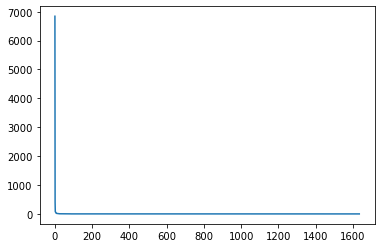

In [16]:
plt.plot(counts)

Blast matches from most to least common: Title, accession, count

In [17]:
for t, v,c in zip(titles, values, counts):
    print(f'{t}, {v}, {c}')

gi|1862650945|gb|MT671829.1| Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/USA/CA-CZB-1776/2020 ORF1ab polyprotein (ORF1ab) ORF1a polyprotein (ORF1ab) surface glycoprotein (S) ORF3a protein (ORF3a) envelope protein (E) membrane glycoprotein (M) ORF6 protein (ORF6) ORF7a protein (ORF7a) ORF7b (ORF7b) ORF8 protein (ORF8) nucleocapsid phosphoprotein (N) and ORF10 protein (ORF10) genes complete cds, MT671829, 6843
gi|1862650932|gb|MT671828.1| Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/USA/CA-CZB-1775/2020 complete genome, MT671828, 403
gi|1862650893|gb|MT671825.1| Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/USA/CA-CZB-1771/2020 complete genome, MT671825, 83
gi|1862738216|gb|CP055292.1| Shigella sonnei strain SE6-1 chromosome complete genome, CP055292, 65
gi|1858626016|gb|MN849868.1| Homo sapiens isolate PNG99 haplogroup Q1a mitochondrion complete genome, MN849868, 61
gi|1834244649|gb|CP051518.1| Lactococc

In [29]:
human_titles = [i for i in titles if 'human' in i.lower() or 'homo sapien' in i.lower()]
human_titles = [i for i in human_titles if 'SARS-CoV-2' not in i]

In [30]:
len(human_titles)

121

In [31]:
human_titles

['gi|1858626016|gb|MN849868.1| Homo sapiens isolate PNG99 haplogroup Q1a mitochondrion complete genome',
 'gi|1851980526|gb|MK617260.1| Homo sapiens isolate 242_Sb haplogroup N1a1a1a1b mitochondrion complete genome',
 'gi|1434874724|gb|BC035832.2| Homo sapiens clone IMAGE:5581122 mRNA',
 'gi|1858625890|gb|MN849859.1| Homo sapiens isolate PNG83 haplogroup M27c mitochondrion complete genome',
 'gi|1850794866|gb|MG660585.1| Homo sapiens isolate TL1630 haplogroup D4b2b mitochondrion complete genome',
 'gi|1858625442|gb|MN849827.1| Homo sapiens isolate PNG21 haplogroup Q1a1 mitochondrion complete genome',
 'gi|768802240|gb|KM986561.1| Homo sapiens isolate Y148 haplogroup L3e2b mitochondrion complete genome',
 'gi|13162554|gb|AC073958.4| Homo sapiens BAC clone RP11-533L22 from 7 complete sequence',
 'gi|6553957|gb|AC009784.2|AC009784 Homo sapiens clone RP11-277F10 from 7q31 complete sequence',
 'gi|1781322856|gb|MN296957.1| Homo sapiens LHRI_LNC1702.1 lncRNA gene complete sequence',
 'gi|182

In [21]:
flu_titles = [i for i in titles if 'influenza' in i.lower()]

In [22]:
flu_titles

['gi|1851723164|dbj|AP022867.1| Haemophilus influenzae 2018-Y40 DNA complete genome']

In [36]:
len(flu_titles)

1

In [23]:
vec_titles = [i for i in titles if 'vector' in i.lower() or 'primer' in i.lower()]

In [24]:
vec_titles

['gi|1860248578|gb|MT612434.1| Cloning vector pMSCV-syn-Gephyrin.FingR-GFP complete sequence',
 'gi|1829619185|gb|MT299805.1| Cloning vector pSF_lenti_SARS-CoV-2_partial-S/E/M/N complete sequence',
 'gi|149286419|gb|EF493211.1| Expression vector pNCO-HISACT-(C49S)-ASLOV2-syn complete sequence']

In [34]:
syn_titles = [i for i in titles if 'artificial' in i.lower() or 'synthetic' in i.lower()]

In [35]:
syn_titles

['gi|1548994296|gb|CP034500.1| Eukaryotic synthetic construct chromosome 21 >gi|1549098691|gb|CP034525.1| Eukaryotic synthetic construct chromosome 21',
 'gi|1548994290|gb|CP034494.1| Eukaryotic synthetic construct chromosome 16 >gi|1549096691|gb|CP034519.1| Eukaryotic synthetic construct chromosome 16',
 'gi|1811185819|gb|MN045327.1| Synthetic construct clone phix_F2_deopt capsid protein (F) gene complete cds',
 'gi|1919626124|gb|MW036243.1| Synthetic construct clone C35/41 complete sequence',
 'gi|1548994292|gb|CP034496.1| Eukaryotic synthetic construct chromosome 18 >gi|1549097232|gb|CP034521.1| Eukaryotic synthetic construct chromosome 18',
 'gi|1548994288|gb|CP034492.1| Eukaryotic synthetic construct chromosome 14 >gi|1549096114|gb|CP034517.1| Eukaryotic synthetic construct chromosome 14',
 'gi|1549097453|gb|CP034522.1| Eukaryotic synthetic construct chromosome 19',
 'gi|1811185823|gb|MN045329.1| Synthetic construct clone phix_F3_deopt capsid protein (F) gene complete cds',
 'gi|1

In [37]:
clone_titles = [i for i in titles if 'clone' in i.lower() or 'construct' in i.lower()]

In [38]:
clone_titles

['gi|1548994296|gb|CP034500.1| Eukaryotic synthetic construct chromosome 21 >gi|1549098691|gb|CP034525.1| Eukaryotic synthetic construct chromosome 21',
 'gi|1434874724|gb|BC035832.2| Homo sapiens clone IMAGE:5581122 mRNA',
 'gi|1548994290|gb|CP034494.1| Eukaryotic synthetic construct chromosome 16 >gi|1549096691|gb|CP034519.1| Eukaryotic synthetic construct chromosome 16',
 'gi|1605039358|gb|MK726424.1| Uncultured bacterium clone OTU_16 16S ribosomal RNA gene partial sequence',
 'gi|1764714099|gb|MN565617.1| Uncultured Limnohabitans sp. clone Jir-CL1-clone69 23S ribosomal RNA gene partial sequence',
 'gi|1811185819|gb|MN045327.1| Synthetic construct clone phix_F2_deopt capsid protein (F) gene complete cds',
 'gi|1919626124|gb|MW036243.1| Synthetic construct clone C35/41 complete sequence',
 'gi|13162554|gb|AC073958.4| Homo sapiens BAC clone RP11-533L22 from 7 complete sequence',
 'gi|1548994292|gb|CP034496.1| Eukaryotic synthetic construct chromosome 18 >gi|1549097232|gb|CP034521.1| E